In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import math


In [12]:
df = pd.read_excel('Amazon Data.xlsx')

In [13]:
#previewing the data
df.head()

,Name,Performance,IQ,Motivation,Annual Salary
0,Reetu Rani,85,109,89,73
1,Akshya,84,106,84,80
2,Akshya Bhatt,87,125,59,67
3,Dilip,69,84,60,58
4,Kiran Babu,69,89,60,67


In [14]:
#checking the size
df.shape

(60, 5)

In [15]:
#checking for data type
df.dtypes

Name             object
Performance       int64
IQ                int64
Motivation        int64
Annual Salary     int64
dtype: object

In [16]:
#performing descriptive statistics
df.describe()

,Performance,IQ,Motivation,Annual Salary
count,60.000000,60.000000,60.000000,60.000000
mean,78.116667,106.650000,66.950000,67.716667
std,8.027689,14.315838,13.586415,12.276603
min,62.000000,73.000000,32.000000,44.000000
25%,72.750000,97.750000,58.000000,58.000000
50%,78.500000,105.500000,65.500000,67.500000
75%,84.000000,112.250000,74.500000,76.500000
max,99.000000,145.000000,97.000000,93.000000


In [17]:
#performing skewness
df.skew()

Performance      0.156654
IQ               0.520067
Motivation       0.087409
Annual Salary    0.088591
dtype: float64

In [71]:
# normal distributive data as skewness is -0.5 to 0.5

In [18]:
# mode
df.mode()

,Name,Performance,IQ,Motivation,Annual Salary
0,Kiran Babu,81.0,104.0,58.0,53
1,NaN,NaN,NaN,72.0,75
2,NaN,NaN,NaN,NaN,81


In [19]:
#kurtosis
df.kurt()

Performance     -0.182097
IQ               0.627460
Motivation      -0.027536
Annual Salary   -0.827099
dtype: float64

In [70]:
# performance, motivation and annual salary has -ve kurtosis means platykurtic not acceptable mean, IQ is mesokurtic 

# Descriptive statistics


In [22]:
df['Performance'].describe()


count    60.000000
mean     78.116667
std       8.027689
min      62.000000
25%      72.750000
50%      78.500000
75%      84.000000
max      99.000000
Name: Performance, dtype: float64

In [24]:
df['IQ'].describe()
df['Motivation '].describe()
df['Annual Salary'].describe()

count    60.000000
mean     67.716667
std      12.276603
min      44.000000
25%      58.000000
50%      67.500000
75%      76.500000
max      93.000000
Name: Annual Salary, dtype: float64

# visualization using histogram Matplotlib

(array([2., 0., 1., 2., 3., 3., 1., 2., 3., 4., 1., 3., 5., 2., 3., 6., 2.,
        3., 4., 1., 4., 1., 1., 0., 1., 0., 0., 1., 0., 1.]),
 array([62.        , 63.23333333, 64.46666667, 65.7       , 66.93333333,
        68.16666667, 69.4       , 70.63333333, 71.86666667, 73.1       ,
        74.33333333, 75.56666667, 76.8       , 78.03333333, 79.26666667,
        80.5       , 81.73333333, 82.96666667, 84.2       , 85.43333333,
        86.66666667, 87.9       , 89.13333333, 90.36666667, 91.6       ,
        92.83333333, 94.06666667, 95.3       , 96.53333333, 97.76666667,
        99.        ]),
 <BarContainer object of 30 artists>)

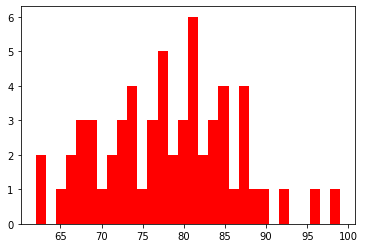

In [25]:
plt.hist(df['Performance'],bins=30,color= 'red')

In [72]:
# data points are far scattered not close as bad mean


(array([ 1.,  0.,  0.,  0.,  1.,  4.,  1.,  0.,  4.,  2.,  5.,  1., 10.,
         5.,  4.,  5.,  3.,  2.,  1.,  1.,  2.,  1.,  2.,  1.,  0.,  2.,
         0.,  0.,  0.,  2.]),
 array([ 73. ,  75.4,  77.8,  80.2,  82.6,  85. ,  87.4,  89.8,  92.2,
         94.6,  97. ,  99.4, 101.8, 104.2, 106.6, 109. , 111.4, 113.8,
        116.2, 118.6, 121. , 123.4, 125.8, 128.2, 130.6, 133. , 135.4,
        137.8, 140.2, 142.6, 145. ]),
 <BarContainer object of 30 artists>)

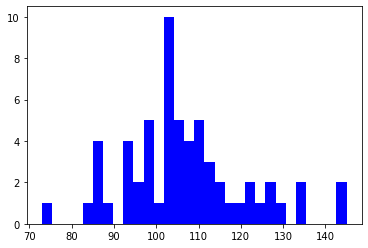

In [26]:
plt.hist(df['IQ'],bins=30,color= 'blue')

In [ ]:
# data point are comparatively closer as IQ is mesokurtic having good mean

(array([1., 0., 0., 0., 1., 1., 1., 1., 1., 2., 1., 4., 8., 3., 4., 3., 4.,
        1., 7., 2., 2., 3., 0., 1., 3., 1., 1., 1., 2., 1.]),
 array([32.        , 34.16666667, 36.33333333, 38.5       , 40.66666667,
        42.83333333, 45.        , 47.16666667, 49.33333333, 51.5       ,
        53.66666667, 55.83333333, 58.        , 60.16666667, 62.33333333,
        64.5       , 66.66666667, 68.83333333, 71.        , 73.16666667,
        75.33333333, 77.5       , 79.66666667, 81.83333333, 84.        ,
        86.16666667, 88.33333333, 90.5       , 92.66666667, 94.83333333,
        97.        ]),
 <BarContainer object of 30 artists>)

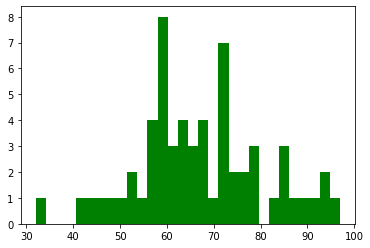

In [27]:
plt.hist(df['Motivation '],bins=30,color= 'green')

(array([2., 0., 1., 1., 1., 4., 3., 2., 2., 5., 1., 2., 3., 0., 5., 2., 0.,
        4., 6., 1., 1., 2., 5., 2., 1., 0., 1., 0., 1., 2.]),
 array([44.        , 45.63333333, 47.26666667, 48.9       , 50.53333333,
        52.16666667, 53.8       , 55.43333333, 57.06666667, 58.7       ,
        60.33333333, 61.96666667, 63.6       , 65.23333333, 66.86666667,
        68.5       , 70.13333333, 71.76666667, 73.4       , 75.03333333,
        76.66666667, 78.3       , 79.93333333, 81.56666667, 83.2       ,
        84.83333333, 86.46666667, 88.1       , 89.73333333, 91.36666667,
        93.        ]),
 <BarContainer object of 30 artists>)

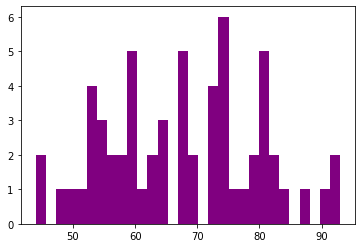

In [28]:
plt.hist(df['Annual Salary'],bins=30,color= 'purple')

# Boxplot using matplotlib

{'whiskers': [<matplotlib.lines.Line2D at 0x204df161be0>,
 'caps': [<matplotlib.lines.Line2D at 0x204df197df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x204df16ae50>],
 'medians': [<matplotlib.lines.Line2D at 0x204df1974c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x204df197340>],
 'means': []}

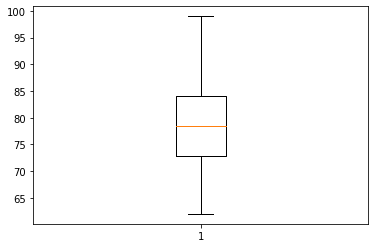

In [29]:
plt.boxplot(df['Performance'])

In [ ]:
# no outlier present

{'whiskers': [<matplotlib.lines.Line2D at 0x204df680eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x204df651790>,
 'boxes': [<matplotlib.lines.Line2D at 0x204df6809d0>],
 'medians': [<matplotlib.lines.Line2D at 0x204df64a760>],
 'fliers': [<matplotlib.lines.Line2D at 0x204df64a9a0>],
 'means': []}

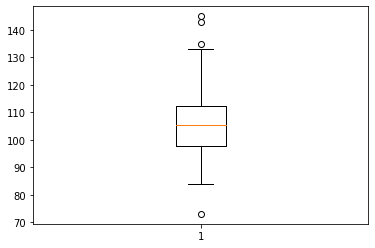

In [30]:
plt.boxplot(df['IQ'])

In [ ]:
# outlier present and data points are far away.

{'whiskers': [<matplotlib.lines.Line2D at 0x204df6d3e50>,
 'caps': [<matplotlib.lines.Line2D at 0x204df6f6bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x204df6d3c10>],
 'medians': [<matplotlib.lines.Line2D at 0x204df6f6220>],
 'fliers': [<matplotlib.lines.Line2D at 0x204df700400>],
 'means': []}

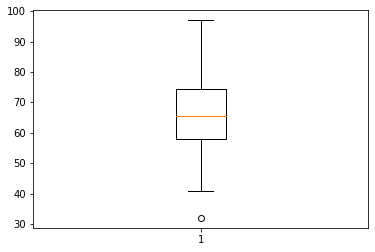

In [31]:
plt.boxplot(df['Motivation '])

{'whiskers': [<matplotlib.lines.Line2D at 0x204e0ac5d90>,
 'caps': [<matplotlib.lines.Line2D at 0x204e0ad4490>,
 'boxes': [<matplotlib.lines.Line2D at 0x204e0ac5a30>],
 'medians': [<matplotlib.lines.Line2D at 0x204e0ad4b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x204e0ad4eb0>],
 'means': []}

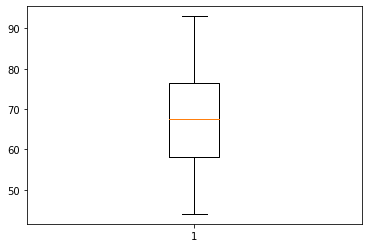

In [32]:
plt.boxplot(df['Annual Salary'])

# visualization using seaborn

C:\Users\aasth\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Performance', ylabel='Density'>

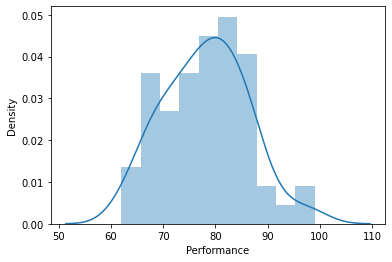

In [33]:
sns.distplot(df['Performance'],bins= 10)

In [ ]:
# better way of visualization, get the better view of distribution plot

C:\Users\aasth\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='IQ', ylabel='Density'>

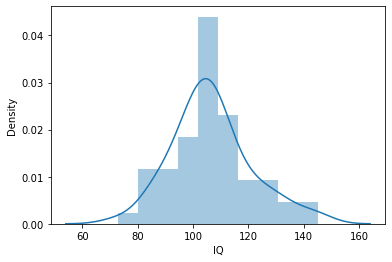

In [34]:
sns.distplot(df['IQ'],bins= 10)

In [ ]:
# IQ is normally distributed

C:\Users\aasth\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Motivation ', ylabel='Density'>

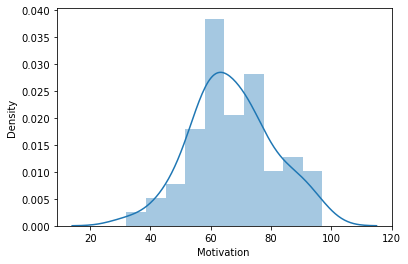

In [35]:
sns.distplot(df['Motivation '],bins= 10)

In [ ]:
# data is skewed -ve skewed

C:\Users\aasth\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Salary', ylabel='Density'>

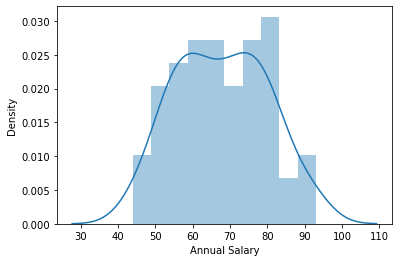

In [36]:
sns.distplot(df['Annual Salary'],bins= 10)

# Boxplot using seaborn

C:\Users\aasth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Performance'>

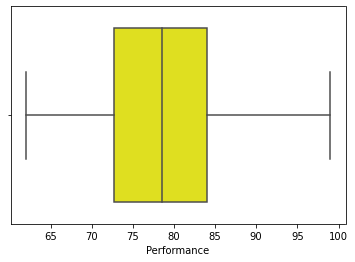

In [37]:
sns.boxplot(df['Performance'],color='yellow')

C:\Users\aasth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IQ'>

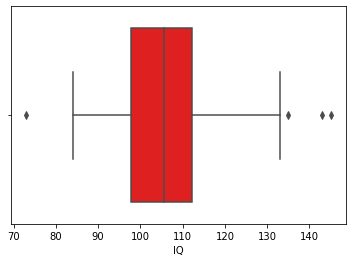

In [39]:
sns.boxplot(df['IQ'],color='red')

C:\Users\aasth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Motivation '>

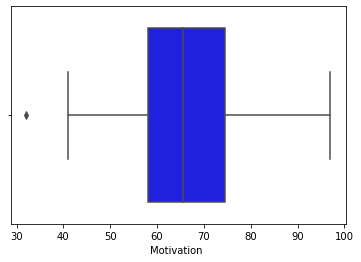

In [40]:
sns.boxplot(df['Motivation '],color='blue')

C:\Users\aasth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Salary'>

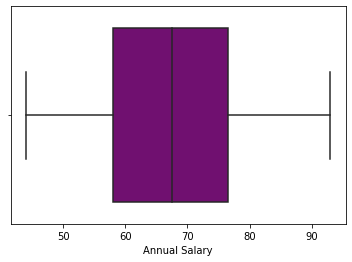

In [41]:
sns.boxplot(df['Annual Salary'],color='purple')

# correlation using matplotlib

Text(0, 0.5, 'Performance')

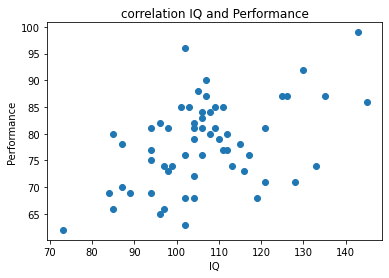

In [42]:
#performing scatter graph using matplotlib
plt.scatter(df['IQ'],df['Performance'])
plt.title('correlation IQ and Performance')
plt.xlabel("IQ")
plt.ylabel("Performance")

In [ ]:
# data points are scattered hence correlation is less

Text(0, 0.5, 'Performance')

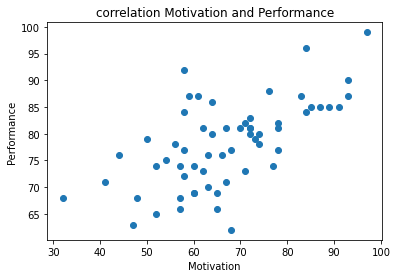

In [43]:
plt.scatter(df['Motivation '],df['Performance'])
plt.title('correlation Motivation and Performance')
plt.xlabel("Motivation")
plt.ylabel("Performance")

In [ ]:
# very bad correlation data points are far away

Text(0, 0.5, 'Performance')

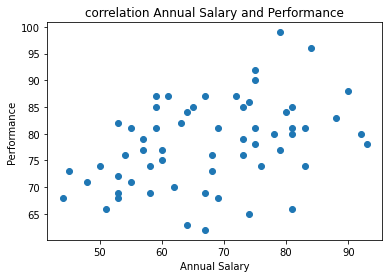

In [44]:
plt.scatter(df['Annual Salary'],df['Performance'])
plt.title('correlation Annual Salary and Performance')
plt.xlabel("Annual Salary")
plt.ylabel("Performance")

# correlation using seaborn

C:\Users\aasth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'correlation IQ and Performance')

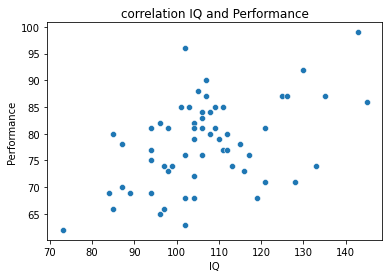

In [45]:
#performing scatter using seaborn
sns.scatterplot(df['IQ'],df['Performance'])
plt.title('correlation IQ and Performance')

C:\Users\aasth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'correlation Motivation and Performance')

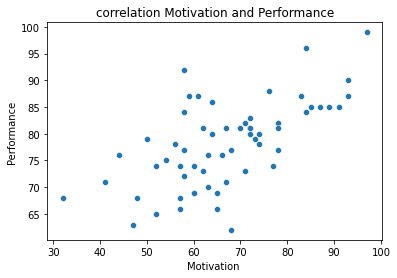

In [46]:
sns.scatterplot(df['Motivation '],df['Performance'])
plt.title('correlation Motivation and Performance')

C:\Users\aasth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'correlation Annual Salary and Performance')

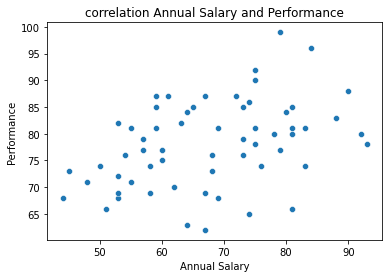

In [47]:
sns.scatterplot(df['Annual Salary'],df['Performance'])
plt.title('correlation Annual Salary and Performance')

# Regression plot with seaborn

C:\Users\aasth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IQ', ylabel='Performance'>

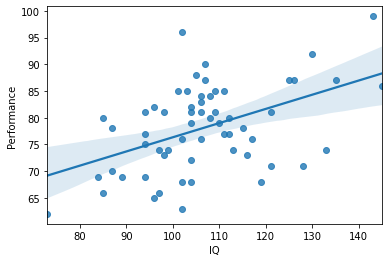

In [48]:
#trend line/ regression line in scatter plot
sns.regplot(df['IQ'],df['Performance'])

In [ ]:
# trend line is not able to cover all data points hence data is scattered and not normally distributed

C:\Users\aasth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Motivation ', ylabel='Performance'>

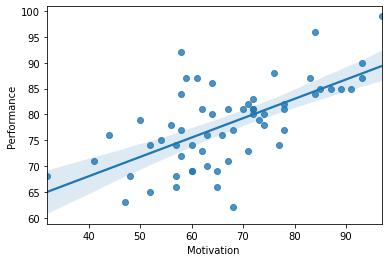

In [49]:
sns.regplot(df['Motivation '],df['Performance'])

C:\Users\aasth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Salary', ylabel='Performance'>

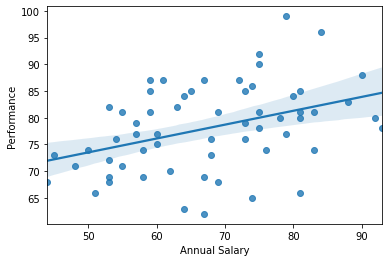

In [50]:
sns.regplot(df['Annual Salary'],df['Performance'])

# correlation matrics

In [51]:
correl = df.corr()

In [52]:
correl

,Performance,IQ,Motivation,Annual Salary
Performance,1.000000,0.473780,0.634866,0.396928
IQ,0.473780,1.000000,0.046878,-0.091805
Motivation,0.634866,0.046878,1.000000,0.363396
Annual Salary,0.396928,-0.091805,0.363396,1.000000


In [ ]:
# there is -ve correlation btw IQ and Annual Salary.

<AxesSubplot:>

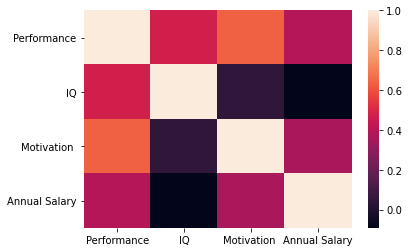

In [53]:
# visualizing correlation matrix through heatmap
sns.heatmap(correl)

# Multiple linear Regression

In [54]:
x= df.iloc[:,2:5]

In [55]:
x.head()

,IQ,Motivation,Annual Salary
0,109,89,73
1,106,84,80
2,125,59,67
3,84,60,58
4,89,60,67


In [57]:
# y= df["Performance"].copy()
y=df.iloc[:,1]
y= pd.DataFrame(y)
y.head()

,Performance
0,85
1,84
2,87
3,69
4,69


In [59]:
lr= LinearRegression()

In [60]:
lr.fit(x,y)

LinearRegression()

In [61]:
# predicting the model
y_pred= lr.predict(x)

# Evaluation using R2 & RMSE

In [63]:
r2= r2_score(y, y_pred)

In [64]:
r2

0.6544647200265603

In [ ]:
# the model can only predict 65% of information

In [65]:
mse= mean_squared_error(y,y_pred)

In [66]:
mse

21.896474709894658

In [67]:
rmse = math.sqrt(mse)

In [68]:
rmse

4.679366913364954

In [ ]:
# the prediction can vary upto 4.679 as rmse is not zero

In [69]:
print("the r2 for the model is :",r2)
print("the rmse for model is :", rmse)

the r2 for the model is : 0.6544647200265603
the rmse for model is : 4.679366913364954
